# Predicting House Prices using Machine Learning


We are going to take the following approach for our problem:

1. Problem Definition
2. Data
3. Features
4. Exploratory Data Analysis (EDA)
5. Preprocessing of data
6. Modelling and tuning of models
7. Predicting on our test dataset



## 1. Problem Definition
Given the different aspects of a house, are we able to predict the final price of a house?

## 2. Data
This is a competition that is hosted by Kaggle.

The data that we are using comes from the Kaggle Website below: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## 3. Features
There are a total of 79 features in the dataset. The data description text file contains the full description of each column.

* SalePrice - the property's sale price in dollars. This is the target variable that we are trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


## 4. Exploratory Data Analysis (EDA)
In our EDA section, we will analyse the different features of our dataset and address the following questions.

1. What question are we trying to solve?
2. What kind of data do we have and how do we treat different type of data?
3. Are there any missing data? How do we deal with them?
4. Are there any outliers? How do we deal with them?
5. Are there any duplicates? How do we deal with them?
6. Explore some correlation that may exist between our features and our target variable

### Preparing the tools we need
We will begin off with importing our tools for data analysis and manipulation from the various libraries.

In [1]:
#Importing the tools we need for our data analysis and visualization

#For exploratory data analysis and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For our plots to appear inside the notebook
%matplotlib inline

### 4.1 What question are you trying to solve?
Here, we are trying to predict a house price given the different aspects of a house. Our target variable is the SalePrice column and the rest of the columns are our features.

In [2]:
#Load data into pandas dataframe
df=pd.read_csv('data/train.csv')

#View the top 5 rows of our loaded dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Get overall info for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Lets' get a quick overview of our SalePrice column
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

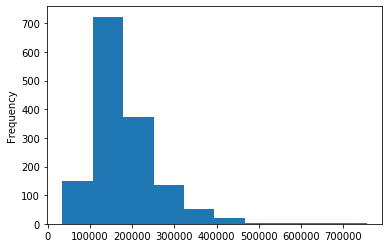

In [5]:
#Look at the  distribution of our SalePrice column

df['SalePrice'].plot.hist();




We see that the the distribution of sales price is right-skewed,  with a relatively long tail at high prices.


Since we are performing regression here, sometimes it makes sense to log-transform the target variable when it is skewed. Besides making the distribution more symmetric, working with the log of the sale price will also ensure that relative errors for cheaper and more expensive homes are treated on an equal footing. 

This is also in line with the evaluation metric used by Kaggle as seen below.

Excerpt from Kaggle:  
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

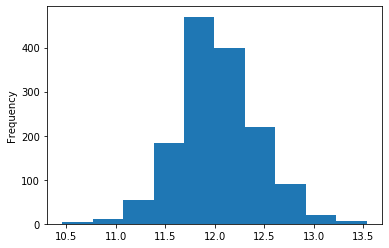

In [6]:
#Look at the  distribution of our SalePrice column-Logged transformed

np.log(df['SalePrice']).plot.hist();



### 4.2 What kind of data do we have and how do we treat different types of data?

In [7]:
#Lets's check the data types for our data
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
#Find out which columns are numeric
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
#Find out which columns are object
categorical_features=df.select_dtypes(exclude=[np.number])
categorical_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

### 4.3 Are there any missing data? How do we deal with them?

In [10]:
#Check for missing data
df.isnull().sum().sort_values(ascending=False)[:30]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
dtype: int64

To gain a better understanding of the missing values, We refer back to our data description to evaluate the nature of the missing values.


**Missing for a reason**:

Based on reference from the data description, many values are missing for a reason as they represent that the particular feature is not present in the house. For instance, the missing values in PoolQC means that the house has no pool and missing values in alley means that the house has no alley access.

In this case, it makes sense to fill these missing values with something that captures this information.

For categorical features, for example, we can replace missing values in such cases with a new value called ‘None’:

For numerical features, we can replace missing values in such cases with a new value 0


**Missing at random**

The reasons for these missing values are not clear and, having no further information, we may assume that they are missing at random. 

We'll will impute these with the mean(for numerical) and mode(and categorical) respectively.

* LotFRontage-Numerical
* MasVnrArea -Numerical
* MasVnrType -Categorical
* Electrical-Categorical








### 4.4 Are there any outliers? How should we deal with them?
Outliers are extreme values that are outside the range of what is expected and unlike the other data. Machine learning modeling and model skill in general can be improved by understanding why they are there and even removing these outlier values.

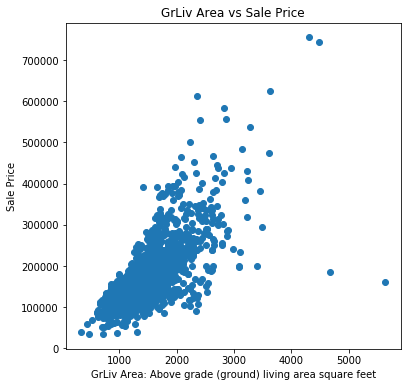

In [11]:
#Let's check if there's any outliers in our data for our numeric features.
#Look at our sales price vs GrLiv area


plt.figure(figsize=(6,6))

plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.title('GrLiv Area vs Sale Price')
plt.xlabel('GrLiv Area: Above grade (ground) living area square feet')
plt.ylabel('Sale Price');







We see that an increase in living area correspond to increases in sales price.

There seems to be a few outliers who do not fall into this trend where they have a large GrLiv Area but a lower sales price.



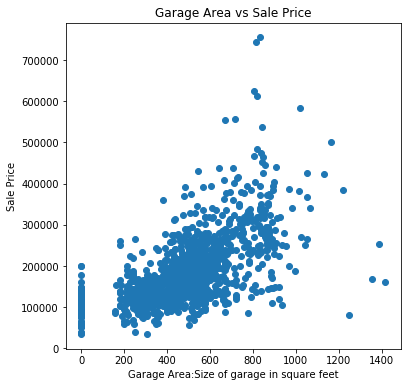

In [12]:
#Look at our sales price vs Garage area


plt.figure(figsize=(6,6))

plt.scatter(df['GarageArea'],df['SalePrice'])
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area:Size of garage in square feet')
plt.ylabel('Sale Price');




Again, we see that an increase in garage area generally lead  to a increase in price.

There are a few outliers as well. We will remove these outliers in our data preprocessing section.



### 4.5 Are there any duplicates? How should we deal with them?

In [13]:
#Check for duplicates
df.duplicated(subset=['Id'], keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

There are no duplicates in our dataset.

### 4.6 Explore some correlation that may exist between our features and our target variable

Previously, we have already seen that our features GrLiv Area and Garage Area have a postive correlation with our target variable-SalesPrice.

We will expand our exploration to look at other features.

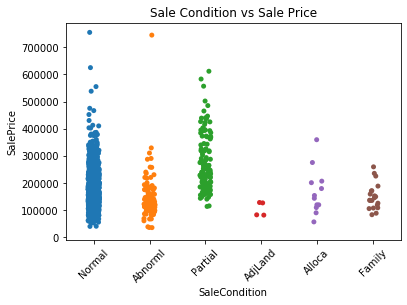

In [14]:
#Sale Condition vs Sale Price
sns.stripplot(x=df['SaleCondition'], y=df['SalePrice'])
plt.title('Sale Condition vs Sale Price')
plt.xticks(rotation=45);

From the graph above, we see that houses with a partial sale condition have the higher sales prices in general and houses with the family sale condition fetches the lowest sale prices.

Note: The details for sale condition:

* Normal	- Normal Sale
* Abnorml	-Abnormal Sale -  trade, foreclosure, short sale
* AdjLand-	Adjoining Land Purchase
* Alloca-	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
* Family-	Sale between family members
* Partial-	Home was not completed when last assessed (associated with New Homes)


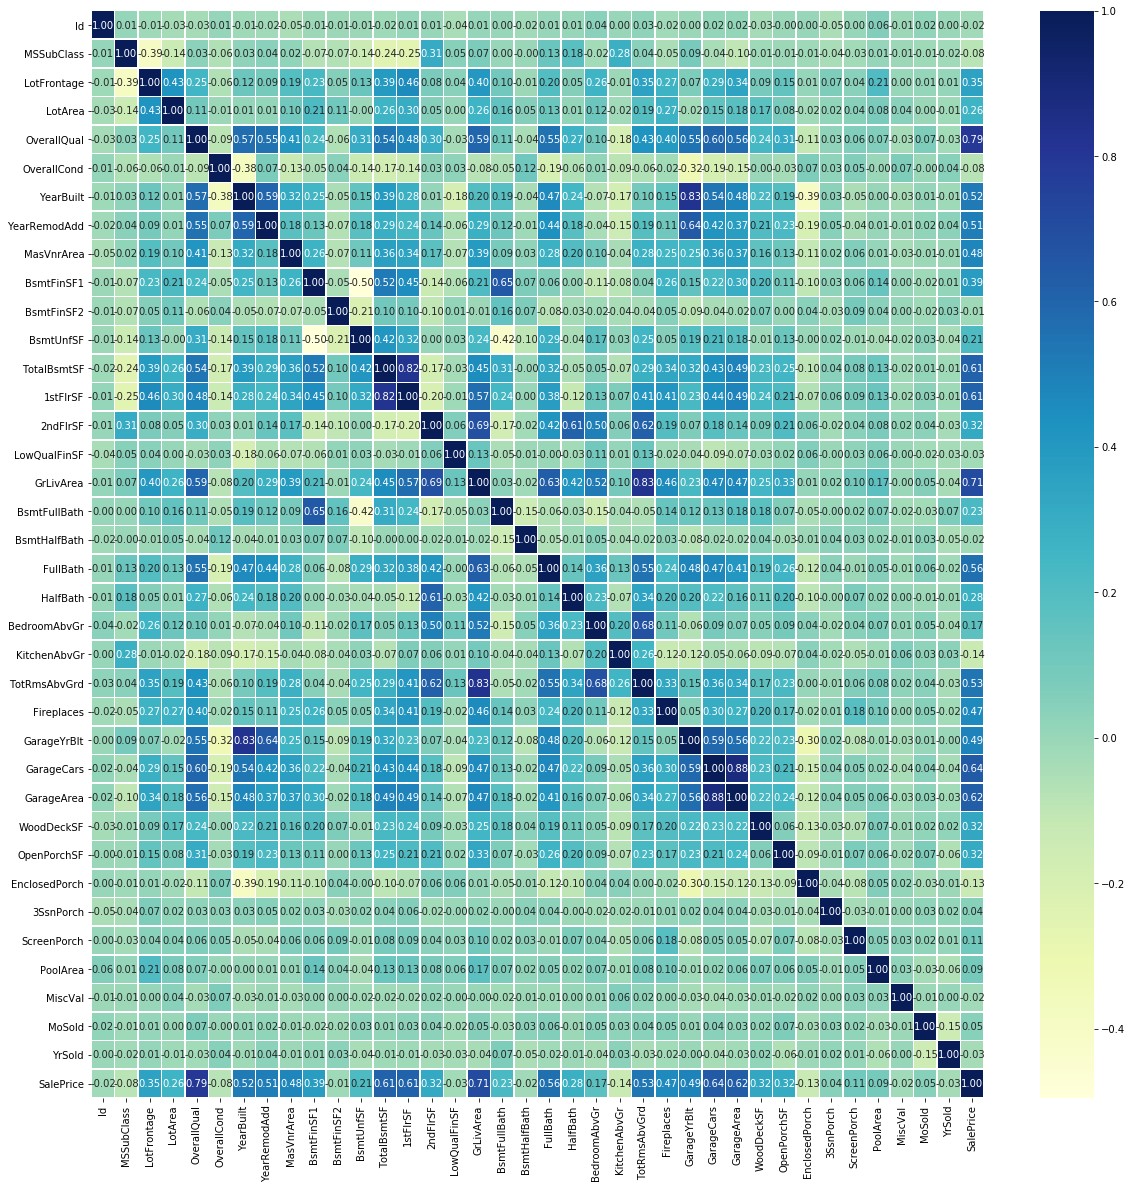

In [15]:
#We use'll a correlation matrix to see how our variable relates to each other

corr_matrix=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.5,
           fmt='.2f',
           cmap='YlGnBu');

### 5. Preprocessing of data

Now that we have gained a better understanding of our data and its features, we move on to our next step- to process our data before we can use them to train our models. In this section, we will be performing the following steps.

1. Remove outliers 
2. Splitting our data into training and validation set first using train test split before any imputation/transformation of data is performed.
3. Impute missing values
4. Convert non-numerical data into numbers

### 5.1 Remove outliers

In [16]:
#Remove outliers 
df1 = df[df['GarageArea'] < 1200]

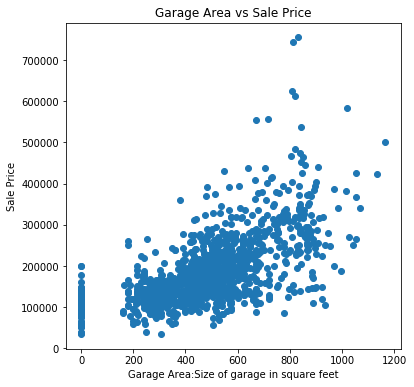

In [17]:
#Check that outlier has been removed: Look at our sales price vs Garage area

plt.figure(figsize=(6,6))

plt.scatter(df1['GarageArea'],df1['SalePrice'])
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area:Size of garage in square feet')
plt.ylabel('Sale Price');


### 5.2 Splitting our data into train test split first before any imputation/transformation of data
To train a machine learning model, data has to be split into training set, validation set. We'll train a model using the train set, evaluate and experiment on the model using our validation set and test our model on the test set.

Before we perform any imputation/transformation, we need to split our data into training set and validation set first. This is to ensure that there will be no data leakage.

In [18]:
#Spliting our data into the features variables and the target variable 

X=df1.drop(['SalePrice','Id'],axis=1) #Drop our target variable and the ID column which has no relation to SalePrice
y=np.log(df1['SalePrice'])



In [19]:
#View X and y
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [20]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [21]:
#View the shape of X and y
X.shape,y.shape

((1455, 79), (1455,))

In [22]:
#Split the data into training and validation set 

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=10)

In [23]:
#View the shape of training and validation set

X_train.shape,X_val.shape,y_train.shape,y_val.shape


((1164, 79), (291, 79), (1164,), (291,))

### 5.3 Impute missing values
We'll perform imputation/transformation on our training dataset and validation dataset separately. We'll start off with training set first then apply the same imputation/transformation to our validation dataset.

We will take the following steps below:

#### For missing values with reason:   
For categorical features, we can replace missing values in such cases with a new value called ‘None’:

For numerical features, we can replace missing values in such cases with a new value 0


#### For missing values at random: 

The reasons for these missing values are not clear and, having no further information, we may assume that they are missing at random. 

We'll will impute these with the median(for numerical) and mode(and categorical) respectively.

* LotFRontage-Numerical
* MasVnrArea -Numerical
* MasVnrType -Categorical
* Electrical-Categorical





In [24]:
#Check for missing data
df.isnull().sum().sort_values(ascending=False)[:30]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
dtype: int64

In [25]:
#Group the different categories of missing data

categorical_missing_for_reason=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']

numeric_missing_for_reason=['GarageYrBlt']

categorical_missing_at_random=['MasVnrType','Electrical']

numeric_missing_at_random=['LotFrontage','MasVnrArea']

In [26]:
len(categorical_missing_for_reason),len(numeric_missing_for_reason),len(categorical_missing_at_random),len(numeric_missing_at_random)

(14, 1, 2, 2)

In [27]:
#View X_train
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1300,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
885,120,FV,50.0,5119,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,1,2008,CWD,Abnorml
1056,120,RL,43.0,7052,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1087,60,FV,85.0,10574,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
359,60,RL,78.0,12011,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,374,0,NaN,NaN,NaN,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal
1349,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
527,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2008,New,Partial
1152,20,RL,90.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml


In [28]:
#Fill missing values for categorical features missing for reason
categorical_missing_for_reason=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
X_train[categorical_missing_for_reason]=X_train[categorical_missing_for_reason].fillna('none')


#View X_train
X_train

C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1300,60,RL,NaN,10762,Pave,none,IR1,Lvl,AllPub,CulDSac,...,0,0,none,none,none,0,5,2009,WD,Normal
885,120,FV,50.0,5119,Pave,none,IR1,Lvl,AllPub,CulDSac,...,0,0,none,none,none,0,1,2008,CWD,Abnorml
1056,120,RL,43.0,7052,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,6,2006,WD,Normal
1087,60,FV,85.0,10574,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,5,2009,WD,Normal
359,60,RL,78.0,12011,Pave,none,IR1,Lvl,AllPub,CulDSac,...,374,0,none,none,none,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,50,RL,60.0,7200,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,GdPrv,none,0,5,2009,WD,Normal
1349,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,12,2008,WD,Normal
527,60,RL,67.0,14948,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,11,2008,New,Partial
1152,20,RL,90.0,14115,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,7,2006,WD,Abnorml


In [29]:
#Fill missing values for numeric features missing for reason
numeric_missing_for_reason=['GarageYrBlt']
X_train[numeric_missing_for_reason]=X_train[numeric_missing_for_reason].fillna(0)

#View X_train
X_train


C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1300,60,RL,NaN,10762,Pave,none,IR1,Lvl,AllPub,CulDSac,...,0,0,none,none,none,0,5,2009,WD,Normal
885,120,FV,50.0,5119,Pave,none,IR1,Lvl,AllPub,CulDSac,...,0,0,none,none,none,0,1,2008,CWD,Abnorml
1056,120,RL,43.0,7052,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,6,2006,WD,Normal
1087,60,FV,85.0,10574,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,5,2009,WD,Normal
359,60,RL,78.0,12011,Pave,none,IR1,Lvl,AllPub,CulDSac,...,374,0,none,none,none,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,50,RL,60.0,7200,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,GdPrv,none,0,5,2009,WD,Normal
1349,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,12,2008,WD,Normal
527,60,RL,67.0,14948,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,11,2008,New,Partial
1152,20,RL,90.0,14115,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,7,2006,WD,Abnorml


In [30]:
#Fill missing values for categorical features missing at random
categorical_missing_at_random=['MasVnrType','Electrical']
X_train[categorical_missing_at_random]=X_train[categorical_missing_at_random].fillna(X_train.mode().iloc[0])




C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
#View X_train
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1300,60,RL,NaN,10762,Pave,none,IR1,Lvl,AllPub,CulDSac,...,0,0,none,none,none,0,5,2009,WD,Normal
885,120,FV,50.0,5119,Pave,none,IR1,Lvl,AllPub,CulDSac,...,0,0,none,none,none,0,1,2008,CWD,Abnorml
1056,120,RL,43.0,7052,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,6,2006,WD,Normal
1087,60,FV,85.0,10574,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,5,2009,WD,Normal
359,60,RL,78.0,12011,Pave,none,IR1,Lvl,AllPub,CulDSac,...,374,0,none,none,none,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,50,RL,60.0,7200,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,GdPrv,none,0,5,2009,WD,Normal
1349,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,12,2008,WD,Normal
527,60,RL,67.0,14948,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,11,2008,New,Partial
1152,20,RL,90.0,14115,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,7,2006,WD,Abnorml


In [32]:
#Fill missing values for numeric features missing for reason
numeric_missing_at_random=['LotFrontage','MasVnrArea']
X_train[numeric_missing_at_random]=X_train[numeric_missing_at_random].fillna(X_train.mean())

C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
#Check that there is no more missing values in X_train

X_train.isna().sum().sort_values(ascending=False)[:30]


SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
dtype: int64

In [34]:
X_train.shape

(1164, 79)

In [35]:
#Check for missing values in X_val
X_val.isna().sum().sort_values(ascending=False)[:30]

PoolQC           290
MiscFeature      281
Alley            272
Fence            233
FireplaceQu      139
LotFrontage       54
GarageType        23
GarageFinish      23
GarageQual        23
GarageCond        23
GarageYrBlt       23
BsmtFinType2       7
BsmtCond           6
BsmtExposure       6
BsmtFinType1       6
BsmtQual           6
MasVnrArea         1
MasVnrType         1
RoofStyle          0
RoofMatl           0
Exterior1st        0
ExterQual          0
Exterior2nd        0
YearBuilt          0
ExterCond          0
Foundation         0
YearRemodAdd       0
SaleCondition      0
OverallCond        0
OverallQual        0
dtype: int64

In [36]:
#Repeating all the imputation steps for our X_val dataset


categorical_missing_for_reason=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
X_val[categorical_missing_for_reason]=X_val[categorical_missing_for_reason].fillna('none')

numeric_missing_for_reason=['GarageYrBlt']
X_val[numeric_missing_for_reason]=X_val[numeric_missing_for_reason].fillna(0)

categorical_missing_at_random=['MasVnrType','Electrical']
X_val[categorical_missing_at_random]=X_val[categorical_missing_at_random].fillna(X_train.mode().iloc[0])

numeric_missing_at_random=['LotFrontage','MasVnrArea']
X_val[numeric_missing_at_random]=X_val[numeric_missing_at_random].fillna(X_train.mean())


In [37]:
#Check that there is no more missing values in X_val
X_val.isna().sum().sort_values(ascending=False)[:30]

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
dtype: int64

### 5.3 Converting non-numerical data into numbers for both training and validation set
We will convert our non-numerical data into numbers using the Scikit-Learn One Hot Encoder




In [38]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [40]:
#Let's convert the non-numerical column to one hot encoded -Transform training and validation set separately

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

non_numerical_features=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
one_hot=OneHotEncoder(sparse=False,handle_unknown='ignore') #sparse=False to return a numpy array, handle unknown='ignore' to ignore any unknown categorical data(eg, category which may be present in train set but not in valid set)
transformer=ColumnTransformer([('one_hot',
                               one_hot,
                               non_numerical_features)],
                              remainder='passthrough')

transformed_X_train=transformer.fit_transform(X_train)

#Transform our X_val data
transformed_X_val=transformer.transform(X_val)

In [41]:
#Check the shape of our transformed X_train and X_val
transformed_X_train.shape,transformed_X_val.shape

((1164, 296), (291, 296))

We have successfully imputed all missing values and converted non-numerical data to numerical data . Now that both our training and data set has been processed, we can move on to modelling

## 6. Modelling
We are dealing with a regression problem and the following algorithm will be used to train our models.

* Ridge Regression
* Lasso
* Elastic Net
* Random Forest Regressor
* GradientBoostingRegressor
* Ensemble Regressor
* Linear SVR
* SVR
* SGD Regressor
* LinearRegression


In [42]:
#import all the models from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

    
#Import cross-validation score module
from sklearn.model_selection import cross_val_score    
    
    

In [43]:
#Put models in a dictionary


models={'Ridge':Ridge(),
       'Lasso': Lasso(),
       'ElasticNet':ElasticNet(),
        'Random Forest Regressor':RandomForestRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'Linear SVR':LinearSVR(),
        'SVR':SVR(),
       'SGDRegressor':SGDRegressor(),
       'Linear Regression':LinearRegression()}

#Create function to fit and score models

def fit_and_score(models, X_train,X_val,y_train,y_val):
    '''
    
    Fits and evaluate given machine learning models
    
    models: a dict of different Sklearn machine learning models
    
    X_train :training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    
    '''
    #Set random seed 
    np.random.seed(42)
    
    #Make a empty dict to keep model scores
    models_scores={}
    
    #Loop through key, value in models
    for name,model in models.items():
        
        #Fit the model to the training data
        model.fit(X_train,y_train)
        
        #Evaluate the model and append its 5 fold cross-val scores to models_scores
        #you are creating the key and value pair in model_scores
        
        models_scores[name]=np.mean(cross_val_score(model,X_val,y_val,cv=5))
        
    return models_scores




    


In [44]:
model_scored=fit_and_score(models=models,
                           X_train=transformed_X_train,
                           X_val=transformed_X_val,
                           y_train=y_train,
                           y_val=y_val)

C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\sklearn\svm\_base.py:946: Converge

In [45]:
model_scored

{'Ridge': 0.8499416692792574,
 'Lasso': 0.8207978688132416,
 'ElasticNet': 0.8331680237947017,
 'Random Forest Regressor': 0.8180727194428172,
 'GradientBoostingRegressor': 0.8415348124297239,
 'Linear SVR': 0.6238359392771573,
 'SVR': 0.7001806502166411,
 'SGDRegressor': -3.2174485660722053e+34,
 'Linear Regression': 0.07276613673087984}

Looking at the above, Ridge Regression and GradientBoosting Regressor fared the best with an accuracy of around 0.84. Let's try to tune them to improve our model score.

### 6.1 Hyperparameter Tuning
* Randomized Search CV
* Grid Search CV

#### Tuning the Ridge Model

In [46]:
#Let's see the default parameters used for our ridge regression model

ridge_model = Ridge()

ridge_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [47]:
#Using RandomizedSearchCV to tune
from sklearn.model_selection import RandomizedSearchCV

ridge_grid = {"alpha": np.arange(2, 50),
                "solver": ['auto',"svd",'sag']}

ridge_model=RandomizedSearchCV(Ridge(),
                           param_distributions=ridge_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

ridge_model.fit(transformed_X_train,y_train)

print("Best score: {}".format(ridge_model.best_score_))
print("Optimal params: {}".format(ridge_model.best_estimator_))
print('Optimal params:{}'.format(ridge_model.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8938539878612319
Optimal params: Ridge(alpha=14, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Optimal params:{'solver': 'auto', 'alpha': 14}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


In [48]:
#Using GridSearchCV to tune
from sklearn.model_selection import GridSearchCV

ridge_grid = {"alpha": np.arange(2, 50),
                "solver": ['auto',"svd"]}


ridge_gs_model=GridSearchCV(Ridge(),
                           param_grid=ridge_grid,
                           cv=5,
                           verbose=True,
                        n_jobs=-1)

ridge_gs_model.fit(transformed_X_train,y_train)

print("Best score: {}".format(ridge_gs_model.best_score_))
print("Optimal params: {}".format(ridge_gs_model.best_estimator_))
print('Optimal params:{}'.format(ridge_gs_model.best_params_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s


Best score: 0.8938703043641361
Optimal params: Ridge(alpha=16, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Optimal params:{'alpha': 16, 'solver': 'auto'}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   17.9s finished


Through tuning, we got a score of 0.89387,Optimal params:{'alpha': 16, 'solver': 'auto'}

#### Tuning the GradientBoostingRegressor Model

In [49]:
#Let's see the default parameters used for our Gradient Boosting Regression model

gbr_model = GradientBoostingRegressor()

gbr_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [50]:
#Using RandomizedSearchCV to tune

from sklearn.model_selection import RandomizedSearchCV

gbr_grid = {"loss": ['ls','huber'],
            "learning_rate": [0.10,0.20],
           'n_estimators':np.arange(100,500,100)}       
   

gbr_model=RandomizedSearchCV(GradientBoostingRegressor(),
                           param_distributions=gbr_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

gbr_model.fit(transformed_X_train,y_train)

print("Best score: {}".format(gbr_model.best_score_))
print("Optimal params: {}".format(gbr_model.best_estimator_))
print('Optimal params:{}'.format(gbr_model.best_params_))

C:\Users\Sharon\Desktop\house_price\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 13.6min finished


Best score: 0.893213575408633
Optimal params: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Optimal params:{'n_estimators': 300, 'loss': 'ls', 'learning_rate': 0.1}


In [51]:
#Using Grid SearchCV to tune
from sklearn.model_selection import GridSearchCV

gbr_grid = {"loss": ['ls'],
            "learning_rate": [0.05,0.1,0.2,0.3],
           'n_estimators':np.arange(100,700,100)}  


gbr_gs_model=GridSearchCV(GradientBoostingRegressor(),
                           param_grid=gbr_grid,
                           cv=5,
                           verbose=True,
                        n_jobs=-1)

gbr_gs_model.fit(transformed_X_train,y_train)

print("Best score: {}".format(gbr_gs_model.best_score_))
print("Optimal params: {}".format(gbr_gs_model.best_estimator_))
print('Optimal params:{}'.format(gbr_gs_model.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.5min finished


Best score: 0.8936489666847518
Optimal params: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Optimal params:{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 400}


Through tuning, we got a score of 0.8936,Optimal params:{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 400}

### Evaluating our models 

The default evaluation metric in the score() function is R^2. We will also look at 
    * Mean Absolute Error MAE
    * Root Mean Square Error(RMSE) - This is the metric used by Kaggle for scoring our submission
    

In [52]:
# Create evaluation function (the competition uses Root Mean Square Error)
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(transformed_X_train)
    val_preds = model.predict(transformed_X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSE": rmse(y_train, train_preds),
              "Valid RMSE": rmse(y_val, val_preds),
              "Training R^2": model.score(transformed_X_train, y_train),
              "Valid R^2": model.score(transformed_X_val, y_val)}
    return scores

In [53]:
# Institate and fit the model (on the training set)
ridge_best_model = ridge_gs_model.best_estimator_
ridge_best_model.fit(transformed_X_train, y_train)

Ridge(alpha=16, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [54]:
#See the scores of our ridge_gs_model
show_scores(ridge_best_model)

{'Training MAE': 0.06863554024008216,
 'Valid MAE': 0.08814712292369055,
 'Training RMSE': 0.10148857924824277,
 'Valid RMSE': 0.12775598127760548,
 'Training R^2': 0.933051319166452,
 'Valid R^2': 0.9085500511728013}

In [55]:
# Institate and fit the model (on the training set)
gbr_best_model = gbr_gs_model.best_estimator_
gbr_best_model.fit(transformed_X_train, y_train)

#Seet the score of our GradientBoostingRegressor model
show_scores(gbr_best_model)


{'Training MAE': 0.03200113942662327,
 'Valid MAE': 0.0872336757005639,
 'Training RMSE': 0.040774804307732435,
 'Valid RMSE': 0.13133293270524077,
 'Training R^2': 0.989193340962398,
 'Valid R^2': 0.9033574752408061}

Our Ridge Model gives us the lower RMSE. We will use it to predict our test data.

### 7. Predicting on our test dataset
In order to use our model to predict on our test dataset, it has to be transformed in the same way as our training dataset

In [56]:
#Import our test data into pandas dataframe
test_df=pd.read_csv('data/test.csv')

In [57]:
#View first 5 rows of our test data
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [58]:
#View a summary of test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [59]:
#Let's drop the test id

test_df1=test_df.drop(['Id'],axis=1)

In [60]:
#Let's check the missing values in our test
test_df1.isna().sum().sort_values(ascending=False)[:50]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageFinish      78
GarageYrBlt       78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
Neighborhood       0
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Condition1         0
HouseStyle         0
ExterQual          0
Condition2         0
BldgType           0
RoofMatl           0
RoofStyle    

In [61]:
#Perform imputation on missing values in test dataset

categorical_missing_for_reason_test=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
test_df1[categorical_missing_for_reason_test]=test_df1[categorical_missing_for_reason_test].fillna('none')

numeric_missing_for_reason_test=['GarageYrBlt']
test_df1[numeric_missing_for_reason_test]=test_df1[numeric_missing_for_reason_test].fillna(0)

categorical_missing_at_random_test=['MasVnrType','Electrical','MSZoning','Utilities','Functional','Exterior2nd','SaleType','Exterior1st','KitchenQual']
test_df1[categorical_missing_at_random_test]=test_df1[categorical_missing_at_random_test].fillna(X_train.mode().iloc[0])


numeric_missing_at_random_test=['LotFrontage','MasVnrArea','BsmtHalfBath','BsmtFullBath','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea']
test_df1[numeric_missing_at_random_test]=test_df1[numeric_missing_at_random_test].fillna(X_train.mean())


In [62]:
#Let's check that there are no more missing values in our test dataset
test_df1.isna().sum().sort_values(ascending=False)[:40]

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
OverallCond      0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
TotalBsmtSF      0
HeatingQC        0
dtype: int64

In [63]:
#Convert our test dataset into numerical using the same transformer(one hot encoder) we used for our training set

transformed_test_df=transformer.transform(test_df1)

In [64]:
#View the shape
transformed_test_df.shape

(1459, 296)

In [65]:
#Make predictions on our test dataset using our best model-ridge_best_model
y_preds=ridge_best_model.predict(transformed_test_df)

In [66]:
#View y_preds
y_preds, y_preds.shape

(array([11.71747163, 11.92917089, 12.07686504, ..., 12.03907441,
        11.61300057, 12.3255054 ]),
 (1459,))

Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp().
So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.

In [67]:
final_predictions = np.exp(y_preds)

In [68]:
final_predictions

array([122696.80931634, 151625.79519797, 175758.30153376, ...,
       169240.2205154 , 110525.39278568, 225371.49299299])

In [69]:
#let's turn our predictions into a dataframe

#Create a dataframe with the 2 columns(PassengerId and Survived) required
predictions_df=pd.DataFrame({'Id': test_df['Id'],
                             'SalePrice':final_predictions})



In [70]:
#Let's view our predictions dataframe
predictions_df

,Id,SalePrice
0,1461,122696.809316
1,1462,151625.795198
2,1463,175758.301534
3,1464,202796.011686
4,1465,191266.005960
...,...,...
1454,2915,87132.143503
1455,2916,82647.235305
1456,2917,169240.220515
1457,2918,110525.392786


In [71]:
#Let's convert our dataframe into a csv file for submission to kaggle
predictions_df.to_csv('predictions-ridgemodel_5.csv',index=False)